In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("movie_data.csv")

In [4]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Data Cleaning and Preprocessing
Firstly, we need to do data cleaning and preprocessing. This involves removing duplicate or incomplete data within a dataset and converting data from one format to another.

The most important features for us are likely to be budget and gross. We must get rid of the samples which have null values of gross or budget features.

In [6]:
df = df[df["gross"].notna()]

In [7]:
df = df[df["budget"].notna()]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3891 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3889 non-null   object 
 1   director_name              3891 non-null   object 
 2   num_critic_for_reviews     3890 non-null   float64
 3   duration                   3890 non-null   float64
 4   director_facebook_likes    3891 non-null   float64
 5   actor_3_facebook_likes     3881 non-null   float64
 6   actor_2_name               3886 non-null   object 
 7   actor_1_facebook_likes     3888 non-null   float64
 8   gross                      3891 non-null   float64
 9   genres                     3891 non-null   object 
 10  actor_1_name               3888 non-null   object 
 11  movie_title                3891 non-null   object 
 12  num_voted_users            3891 non-null   int64  
 13  cast_total_facebook_likes  3891 non-null   int64  
 1

It looks like we have enough samples to gain enough information and make accurate interpretations about the data. So, I will drop the remaining features with null values.

In [9]:
df.dropna(inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3755 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3755 non-null   object 
 1   director_name              3755 non-null   object 
 2   num_critic_for_reviews     3755 non-null   float64
 3   duration                   3755 non-null   float64
 4   director_facebook_likes    3755 non-null   float64
 5   actor_3_facebook_likes     3755 non-null   float64
 6   actor_2_name               3755 non-null   object 
 7   actor_1_facebook_likes     3755 non-null   float64
 8   gross                      3755 non-null   float64
 9   genres                     3755 non-null   object 
 10  actor_1_name               3755 non-null   object 
 11  movie_title                3755 non-null   object 
 12  num_voted_users            3755 non-null   int64  
 13  cast_total_facebook_likes  3755 non-null   int64  
 1

In [11]:
print("Total number of duplicated samples: " + str(len(df[df.duplicated(subset = ["movie_imdb_link"])])))

Total number of duplicated samples: 100


Movie IMDB link is a unique link for each of the movies. That is why we should eliminate duplicate samples based on that link.

In [12]:
df.drop_duplicates(subset = ["movie_imdb_link"], inplace = True)

Profit feature would be beneficial for exploring the data. It can be found by substracting budget from gross.

In [13]:
df["profit"] = df["gross"] - df["budget"]

It is better to strip every value in the dataset because extra spaces can lead to troubles when we do filtering or vice versa.

In [14]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3655 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3655 non-null   object 
 1   director_name              3655 non-null   object 
 2   num_critic_for_reviews     3655 non-null   float64
 3   duration                   3655 non-null   float64
 4   director_facebook_likes    3655 non-null   float64
 5   actor_3_facebook_likes     3655 non-null   float64
 6   actor_2_name               3655 non-null   object 
 7   actor_1_facebook_likes     3655 non-null   float64
 8   gross                      3655 non-null   float64
 9   genres                     3655 non-null   object 
 10  actor_1_name               3655 non-null   object 
 11  movie_title                3655 non-null   object 
 12  num_voted_users            3655 non-null   int64  
 13  cast_total_facebook_likes  3655 non-null   int64  
 1

## Exploratory Data Analysis

Now we can start exploring our dataset. This refers to the method of studying and exploring the data to discover patterns, locate outliers, and identify relationships between variables.

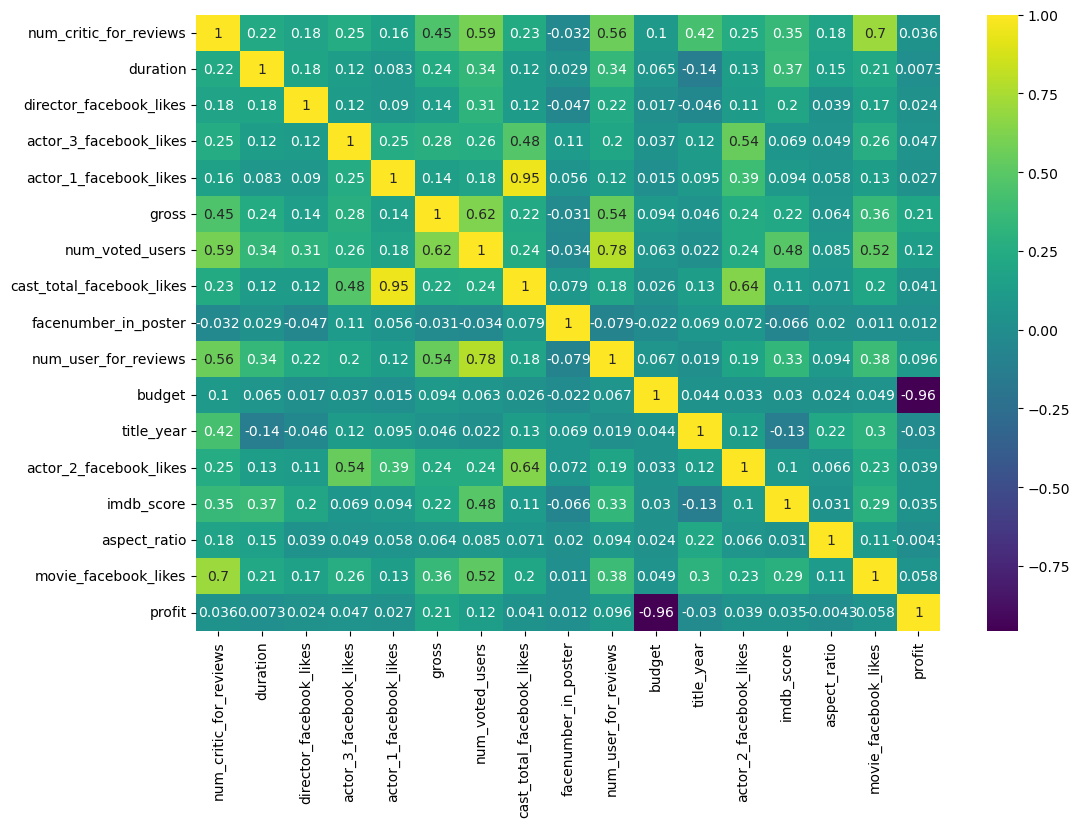

In [16]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="viridis", annot=True)
plt.show()

The above heatmap shows the pearson values between each numerical features in the data.

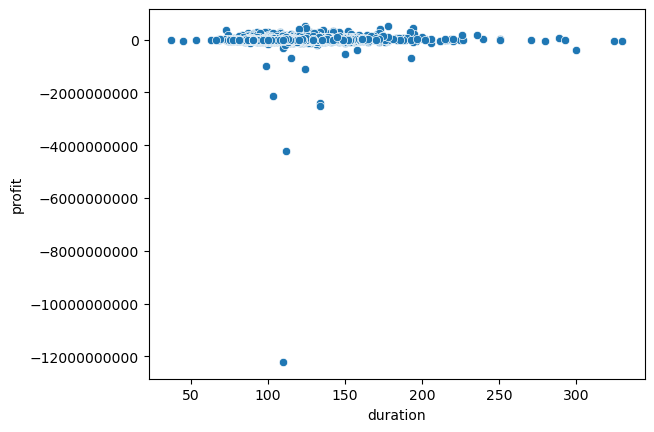

In [17]:
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(data = df, x = "duration", y ="profit")
plt.show()

The scatterplot above shows the relationship between the duration and profit of each movie

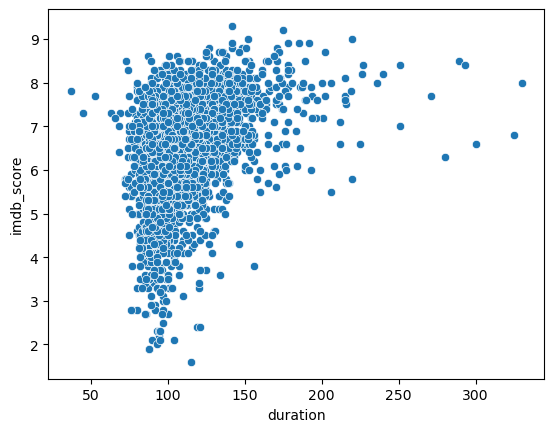

In [18]:
sns.scatterplot(data = df, x = "duration", y ="imdb_score")
plt.show()

The scatterplot above shows the relationship between the duration and IMDB rating of each movie

In [19]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [20]:
directorToProfitImdb = df.groupby("director_name")[["profit", "imdb_score"]].mean()

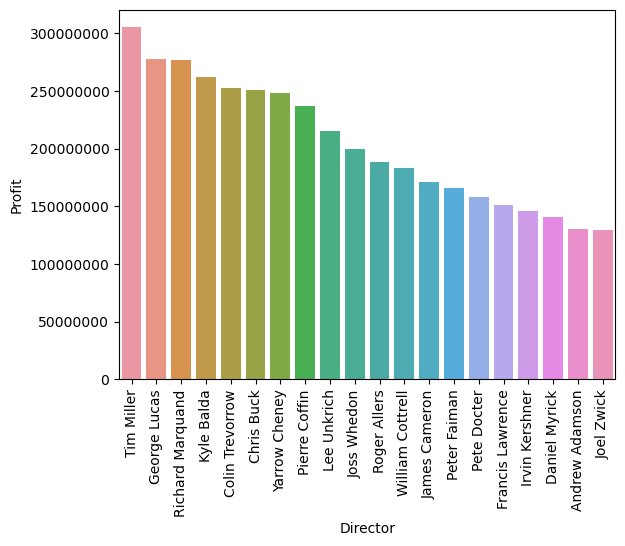

In [21]:
directorToProfit = directorToProfitImdb["profit"].sort_values(ascending=False).head(20)
dictDirectorToProfit = {"Director": directorToProfit.index, "Profit": directorToProfit.values}
dfDirectorToProfit = pd.DataFrame(dictDirectorToProfit)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 90)
sns.barplot(data = dfDirectorToProfit, x = "Director", y = "Profit")
plt.show()

The above barplot shows the directors whose movies make the most profit

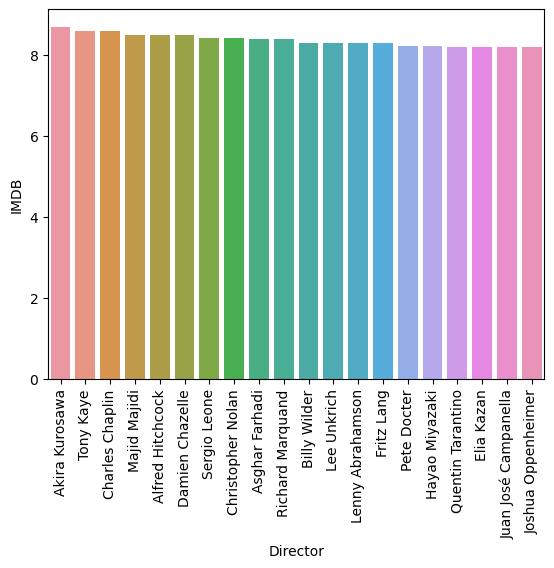

In [22]:
directorToImdb = directorToProfitImdb["imdb_score"].sort_values(ascending=False).head(20)
dictDirectorToImdb = {"Director": directorToImdb.index, "IMDB": directorToImdb.values}
dfDirectorToImdb = pd.DataFrame(dictDirectorToImdb)
plt.xticks(rotation = 90)
sns.barplot(data = dfDirectorToImdb, x = "Director", y = "IMDB")
plt.show()

The above barplot shows the directors whose movies receive the highest IMDB ratings

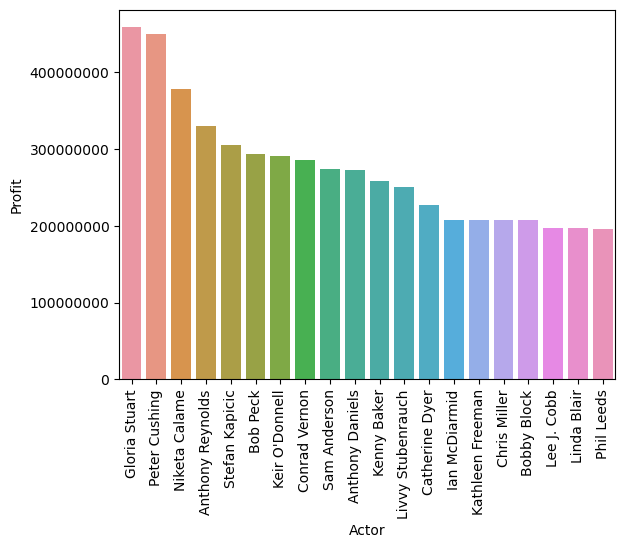

In [23]:
actors = set()
for index, row in df.iterrows():
    actors.add(row["actor_1_name"])
    actors.add(row["actor_2_name"])
    actors.add(row["actor_3_name"])
actors = list(actors)
actorsProfitDict = {}
for actor in actors: actorsProfitDict[actor] = [0, 0]
for index, row in df.iterrows():
    actorsProfitDict[row["actor_1_name"]][0] += row["profit"]
    actorsProfitDict[row["actor_1_name"]][1] += 1
    actorsProfitDict[row["actor_2_name"]][0] += row["profit"]
    actorsProfitDict[row["actor_2_name"]][1] += 1
    actorsProfitDict[row["actor_3_name"]][0] += row["profit"]
    actorsProfitDict[row["actor_3_name"]][1] += 1
for actor in actors: actorsProfitDict[actor] = actorsProfitDict[actor][0] / actorsProfitDict[actor][1]
top20ActorsProfit = pd.DataFrame(actorsProfitDict.items(), columns=['Actor', 'Profit']).sort_values("Profit", ascending=False).head(20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 90)
sns.barplot(data = top20ActorsProfit, x = "Actor", y = "Profit")
plt.show()

The above barplot shows the actors whose movies make the most profit

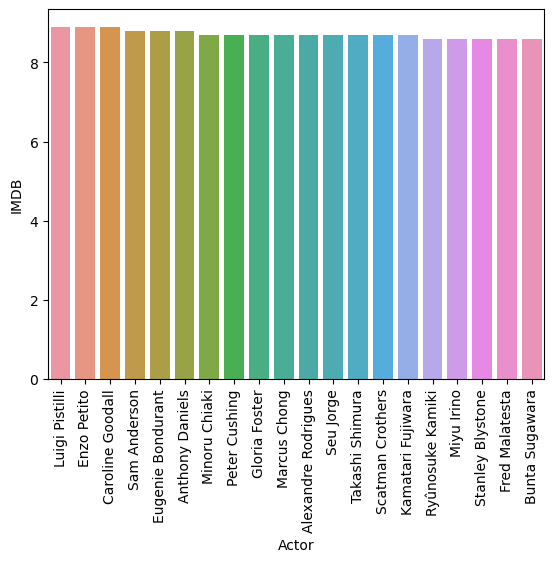

In [24]:
actorsImdbDict = {}
for actor in actors: actorsImdbDict[actor] = [0, 0]
for index, row in df.iterrows():
    actorsImdbDict[row["actor_1_name"]][0] += row["imdb_score"]
    actorsImdbDict[row["actor_1_name"]][1] += 1
    actorsImdbDict[row["actor_2_name"]][0] += row["imdb_score"]
    actorsImdbDict[row["actor_2_name"]][1] += 1
    actorsImdbDict[row["actor_3_name"]][0] += row["imdb_score"]
    actorsImdbDict[row["actor_3_name"]][1] += 1
for actor in actors: actorsImdbDict[actor] = actorsImdbDict[actor][0] / actorsImdbDict[actor][1]
top20ActorsImdb = pd.DataFrame(actorsImdbDict.items(), columns=['Actor', 'IMDB']).sort_values("IMDB", ascending=False).head(20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 90)
sns.barplot(data = top20ActorsImdb, x = "Actor", y = "IMDB")
plt.show()

The above barplot shows the actors whose movies receive the highest IMDB ratings.

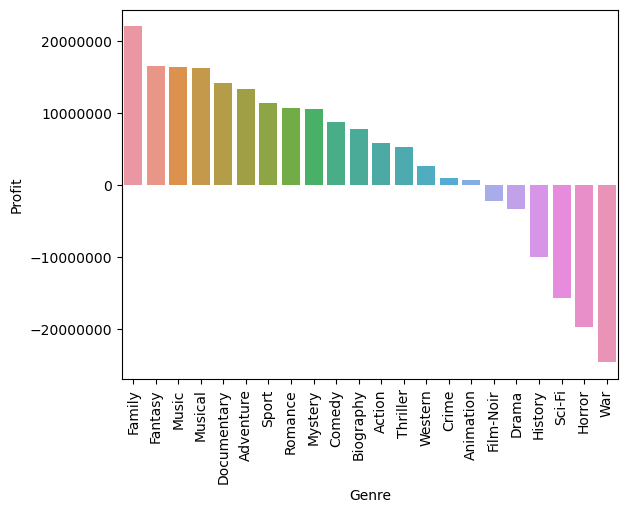

In [25]:
genres = set()
for genresList in df["genres"]:
    for genre in genresList.split("|"): genres.add(genre)
genres = list(genres)
genresProfitDict = {}
for genre in genres: genresProfitDict[genre] = [0, 0]
for index, row in df.iterrows():
    for genre in row["genres"].split("|"):
        genresProfitDict[genre][0] += row["profit"]
        genresProfitDict[genre][1] += 1
for genre in genres: genresProfitDict[genre] = genresProfitDict[genre][0] / genresProfitDict[genre][1]
genresProfit = pd.DataFrame(genresProfitDict.items(), columns=['Genre', 'Profit']).sort_values("Profit", ascending=False)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 90)
sns.barplot(data = genresProfit, x = "Genre", y = "Profit")
plt.show()

The above barplot shows the average profit values of movies for each genre.

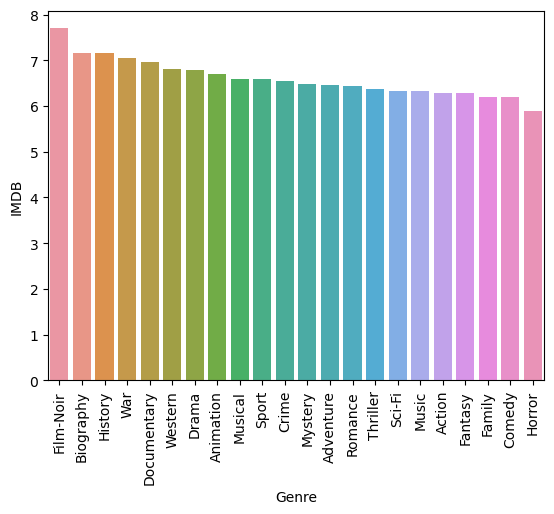

In [26]:
genresImdbDict = {}
for genre in genres: genresImdbDict[genre] = [0, 0]
for index, row in df.iterrows():
    for genre in row["genres"].split("|"):
        genresImdbDict[genre][0] += row["imdb_score"]
        genresImdbDict[genre][1] += 1
for genre in genres: genresImdbDict[genre] = genresImdbDict[genre][0] / genresImdbDict[genre][1]
genresImdb = pd.DataFrame(genresImdbDict.items(), columns=['Genre', 'IMDB']).sort_values("IMDB", ascending=False)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 90)
sns.barplot(data = genresImdb, x = "Genre", y = "IMDB")
plt.show()

The above barplot shows the average IMDB ratings of movies for each genre.

In [27]:
dfBudget = df[df["budget"] < 1500000]
budgetGenres = set()
for genresList in dfBudget["genres"]:
    for genre in genresList.split("|"): budgetGenres.add(genre)
budgetGenres = list(budgetGenres)

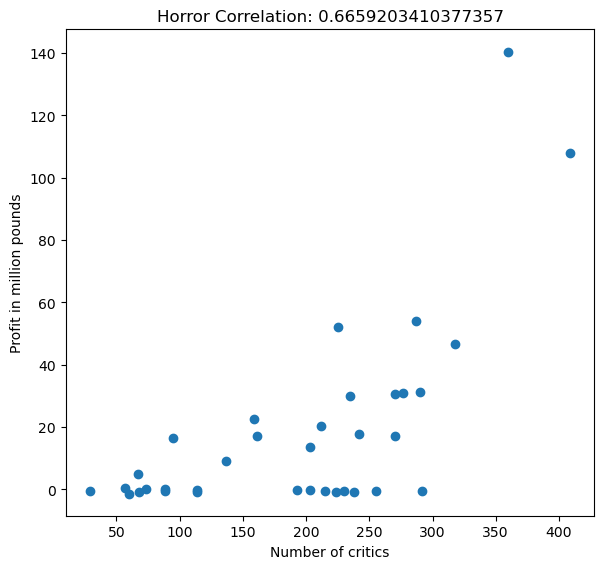

In [28]:
count = 0
plt.figure(figsize=(15,120))
for i in genres:
    dfGenre = dfBudget[dfBudget["genres"].str.contains(i)].copy()
    dfGenre["profit"] = (dfGenre["gross"]-dfGenre["budget"])/1000000
    dfCorr = dfGenre[["num_critic_for_reviews","profit"]]
    corr = dfCorr.corr(method="pearson")
    correlation = corr["num_critic_for_reviews"]["profit"]
    if correlation >= .5 and len(dfGenre) >= 20:
        count +=1
        plt.subplot(16,2,count)
        plt.scatter(dfGenre["num_critic_for_reviews"],dfGenre["profit"])
        plt.title(f"{i}"+" Correlation:" f" {correlation}")
        plt.xlabel("Number of critics")
        plt.ylabel("Profit in million pounds")
plt.show()

The scatterplot above shows that the profit of a horror movie increases as the number of critics for that movie increases.

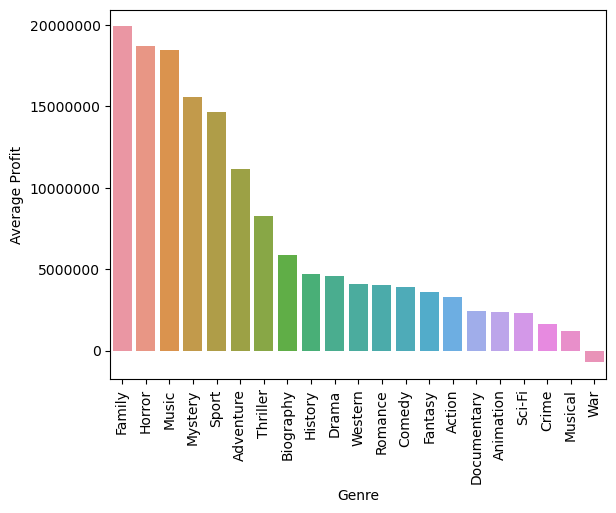

In [29]:
genresProfitBudget = {}
genresMovieCountBudget = {}
for genre in budgetGenres:
    genresProfitBudget[genre] = 0
    genresMovieCountBudget[genre] = 0
for index, row in dfBudget.iterrows():
    for genre in row["genres"].split("|"):
        genresProfitBudget[genre] += row["profit"]
        genresMovieCountBudget[genre] += 1
genresAverageProfitBudget = {}
for genre in budgetGenres: genresAverageProfitBudget[genre] = genresProfitBudget[genre] / genresMovieCountBudget[genre]
genresAverageProfitBudgetDf = pd.DataFrame(genresAverageProfitBudget.items(), columns=['Genre', 'Average Profit']).sort_values("Average Profit", ascending=False)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 90)
sns.barplot(data = genresAverageProfitBudgetDf, x = "Genre", y = "Average Profit")
plt.show()

We can see that budget movies with family, horror, music, mystery, and sport genres have a good profit ratio. We also need to know how many samples we used to find these results. More sample means more accurate result.

In [30]:
print("Number of movies with family genre within the budget of 1.5m: " + str(genresMovieCountBudget["Family"]))
print("Number of movies with horror genre within the budget of 1.5m: " + str(genresMovieCountBudget["Horror"]))
print("Number of movies with music genre within the budget of 1.5m: " + str(genresMovieCountBudget["Music"]))
print("Number of movies with mystery genre within the budget of 1.5m: " + str(genresMovieCountBudget["Mystery"]))
print("Number of movies with sport genre within the budget of 1.5m: " + str(genresMovieCountBudget["Sport"]))

Number of movies with family genre within the budget of 1.5m: 2
Number of movies with horror genre within the budget of 1.5m: 35
Number of movies with music genre within the budget of 1.5m: 8
Number of movies with mystery genre within the budget of 1.5m: 12
Number of movies with sport genre within the budget of 1.5m: 10


Here we can see that only the number of horror movies is enough to trust the result. The number of movies of other genres is not enough to take into consideration.

## Hypothesis Testing
Null Hypothesis (H0): The average profit of horror movies under a budget of £1.5 million is not significantly different from the average profit of other movies under a budget of £1.5 million.

Alternative Hypothesis (H1): The average profit of horror movies under a budget of £1.5 million is significantly different from the average profit of other movies under a budget of £1.5 million.

In [31]:
from scipy.stats import ttest_ind
horrorProfitDf = dfBudget[dfBudget["genres"].str.contains("Horror")]["profit"]
nonHorrorProfitDf = dfBudget[~dfBudget["genres"].str.contains("Horror")]["profit"]
hypothesisValues = ttest_ind(horrorProfitDf, nonHorrorProfitDf, equal_var=False)
tValue = hypothesisValues[0]
pValue = hypothesisValues[1]
print("t-value: " + str(tValue))
print("p-value: " + str(pValue))

t-value: 2.6887694272887126
p-value: 0.010699592954946041


The t-value of 2.69 and p-value of 0.01 suggest that horror movies under a budget of £1.5 million have a higher average profit compared to those in other genres under a budget of £1.5 million.

## Summary

In our investigation into the financial performance of different film genres within a specified budget limit, we focused on assessing whether horror movies, with a budget under £1.5 million, are more profitable compared to movies in other genres under the same budget constraints. The hypothesis testing was structured as follows:

Null Hypothesis (H0): Horror movies with a budget under £1.5 million do not have a significantly different average profit compared to other genres within the same budget range. This hypothesis assumes no specific profitability advantage for horror movies.

Alternative Hypothesis (H1): Horror movies with a budget under £1.5 million have a significantly different (and implied higher) average profit compared to other genres within the same budget range, suggesting that the horror genre could be more lucrative under these budgetary conditions.

Upon conducting the statistical analysis, we obtained a t-value of 2.69 and a p-value of 0.01. These results led us to reject the null hypothesis, implying that horror movies under a budget of £1.5 million indeed exhibit a higher average profit compared to movies in other genres with the same budget limitation.

The findings from this hypothesis test provide a compelling case for considering the horror genre as a potentially more profitable venture for movies with limited budgets. The significant difference in average profit highlights the potential of the horror genre in yielding better financial returns under budget constraints typical to our production capabilities.

This summary encapsulates the essence of the hypothesis test conducted, the statistical results obtained, and their implications for future film production strategies, particularly in terms of genre selection within budgetary limits.